In [1]:
import numpy as np # linear algebra
import pandas as pd 
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
sns.set(style='white', context='notebook', palette='deep')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
Random_state=42
np.random.seed(0)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install openpyxl

In [3]:
test_dataset=pd.read_csv("startup_test_new.csv", \
                           parse_dates=['founded_at','first_funding_at','last_funding_at'])
test_dataset.head()

,ID,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1,701,CA,37.404788,-121.940842,95134,c:40147,San Jose,San Jose CA 95134,C2 Microsystems,2004-01-01,2009-10-12,2009-10-12,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,CA,1,0,0,0,0,hardware,0,0,0,0,0,0,0,0,0,1,c:40147,1,0,0,0,0,0,3.0,1,NaN
1,2,978,CA,37.421022,-122.137741,94301,c:62269,Palo Alto,NaN,GoPollGo,2011-01-01,2011-07-27,2011-07-27,0.5671,0.5671,0.5671,2.3534,5,1,425000,3,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:62269,0,1,0,0,0,0,2.0,1,NaN
2,3,201,CA,35.966068,-115.118671,95066,c:16273,Scotts Valley,NaN,Multigig,2003-01-01,2008-05-12,2010-12-22,5.3644,7.9781,5.2521,5.2521,5,3,37891054,1,CA,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,c:16273,1,0,0,1,1,0,3.0,1,NaN
3,4,665,CA,32.833501,-117.261620,92037,c:38196,La Jolla,La Jolla CA 92037,Ortiva Wireless,2004-01-01,2005-02-01,2011-10-04,1.0877,7.7616,6.8849,6.8849,9,5,40000000,1,CA,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:38196,1,0,1,1,1,0,4.0,1,NaN
4,5,897,CA,34.048857,-118.251343,90245,c:5411,El Segundo,NaN,Sometrics,2007-09-01,2008-05-14,2009-10-16,0.7014,2.1260,2.4027,4.0548,10,3,5550000,4,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:5411,0,0,1,1,0,0,3.0,1,NaN


In [4]:
train_dataset=pd.read_csv("startup_train.csv",\
                    converters={'status': lambda x: int(x == 'acquired')},parse_dates=['founded_at','first_funding_at','last_funding_at'])
train_dataset.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [6]:
train_comparison_column = np.where(train_dataset["state_code"] != train_dataset["state_code.1"], True, False)
print(train_dataset[train_comparison_column]['state_code.1'])
train_dataset.drop(["state_code.1"], axis=1, inplace=True)
train_dataset.head()

515    NaN
Name: state_code.1, dtype: object


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [7]:
test_dataset.drop(["state_code.1"], axis=1, inplace=True)
test_dataset.head()

,ID,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1,701,CA,37.404788,-121.940842,95134,c:40147,San Jose,San Jose CA 95134,C2 Microsystems,2004-01-01,2009-10-12,2009-10-12,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,1,0,0,0,0,hardware,0,0,0,0,0,0,0,0,0,1,c:40147,1,0,0,0,0,0,3.0,1,NaN
1,2,978,CA,37.421022,-122.137741,94301,c:62269,Palo Alto,NaN,GoPollGo,2011-01-01,2011-07-27,2011-07-27,0.5671,0.5671,0.5671,2.3534,5,1,425000,3,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:62269,0,1,0,0,0,0,2.0,1,NaN
2,3,201,CA,35.966068,-115.118671,95066,c:16273,Scotts Valley,NaN,Multigig,2003-01-01,2008-05-12,2010-12-22,5.3644,7.9781,5.2521,5.2521,5,3,37891054,1,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,c:16273,1,0,0,1,1,0,3.0,1,NaN
3,4,665,CA,32.833501,-117.261620,92037,c:38196,La Jolla,La Jolla CA 92037,Ortiva Wireless,2004-01-01,2005-02-01,2011-10-04,1.0877,7.7616,6.8849,6.8849,9,5,40000000,1,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:38196,1,0,1,1,1,0,4.0,1,NaN
4,5,897,CA,34.048857,-118.251343,90245,c:5411,El Segundo,NaN,Sometrics,2007-09-01,2008-05-14,2009-10-16,0.7014,2.1260,2.4027,4.0548,10,3,5550000,4,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:5411,0,0,1,1,0,0,3.0,1,NaN


In [8]:
train_dataset.drop(["Unnamed: 6"],axis=1, inplace=True)
train_dataset.drop(["Unnamed: 0"],axis=1, inplace=True)
train_dataset.head()

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [9]:
test_dataset.drop(["Unnamed: 6"],axis=1, inplace=True)
test_dataset.drop(["Unnamed: 0"],axis=1, inplace=True)
test_dataset.head()

,ID,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1,CA,37.404788,-121.940842,95134,c:40147,San Jose,C2 Microsystems,2004-01-01,2009-10-12,2009-10-12,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,1,0,0,0,0,hardware,0,0,0,0,0,0,0,0,0,1,c:40147,1,0,0,0,0,0,3.0,1,NaN
1,2,CA,37.421022,-122.137741,94301,c:62269,Palo Alto,GoPollGo,2011-01-01,2011-07-27,2011-07-27,0.5671,0.5671,0.5671,2.3534,5,1,425000,3,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:62269,0,1,0,0,0,0,2.0,1,NaN
2,3,CA,35.966068,-115.118671,95066,c:16273,Scotts Valley,Multigig,2003-01-01,2008-05-12,2010-12-22,5.3644,7.9781,5.2521,5.2521,5,3,37891054,1,1,0,0,0,0,semiconductor,0,0,0,0,0,0,0,0,0,1,c:16273,1,0,0,1,1,0,3.0,1,NaN
3,4,CA,32.833501,-117.261620,92037,c:38196,La Jolla,Ortiva Wireless,2004-01-01,2005-02-01,2011-10-04,1.0877,7.7616,6.8849,6.8849,9,5,40000000,1,1,0,0,0,0,mobile,0,0,1,0,0,0,0,0,0,0,c:38196,1,0,1,1,1,0,4.0,1,NaN
4,5,CA,34.048857,-118.251343,90245,c:5411,El Segundo,Sometrics,2007-09-01,2008-05-14,2009-10-16,0.7014,2.1260,2.4027,4.0548,10,3,5550000,4,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:5411,0,0,1,1,0,0,3.0,1,NaN


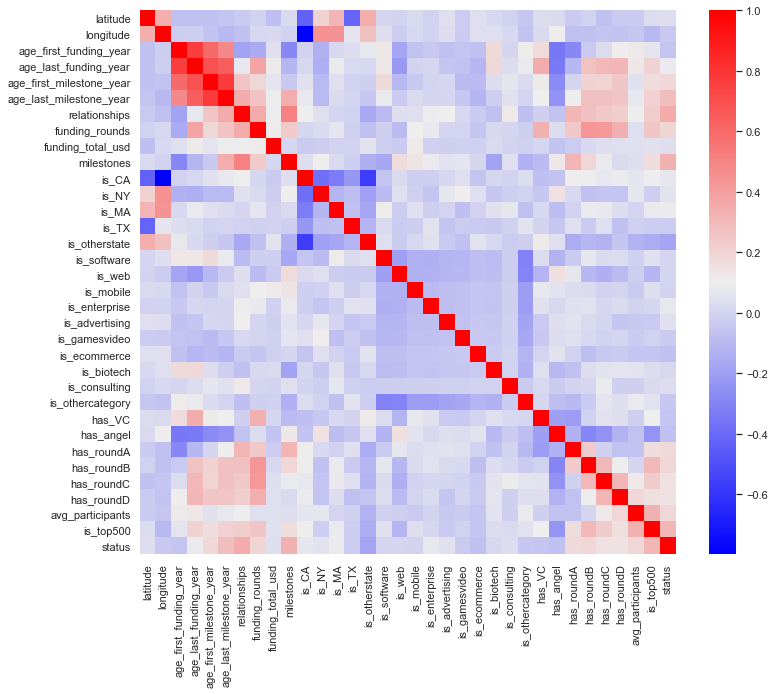

In [10]:
from matplotlib import colors

corr = train_dataset.corr()
plt.figure(figsize=(12,10))
cma = colors.LinearSegmentedColormap.from_list("..",["blue","#EEEEEE","red"],N=1000)
sns.heatmap(corr,cmap=cma)
plt.savefig("corr.png", dpi=200, bbox_inches='tight')

In [11]:
def getOutliersMatrix(numerical_df, threshold=1.5):
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    
    outdata = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))
    
    for name in numerical_df.columns:
        outdata.loc[(outdata[name] == True), name] = 1
        outdata.loc[(outdata[name] == False), name] = 0
    
    return outdata

In [12]:
train_outliers_df = train_dataset.select_dtypes(numerics)
train_outliersMatt = getOutliersMatrix(train_outliers_df)
train_dataset[train_outliersMatt==1] = np.nan

In [13]:
test_outliers_df = test_dataset.select_dtypes(numerics)
test_outliersMatt = getOutliersMatrix(test_outliers_df)
test_dataset[test_outliersMatt==1] = np.nan

In [14]:
train_dataset.isnull().sum()

state_code                    0
latitude                     73
longitude                     3
zip_code                      0
id                            0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year       20
age_last_funding_year        13
age_first_milestone_year    162
age_last_milestone_year     152
relationships                54
funding_rounds               16
funding_total_usd            63
milestones                    1
is_CA                         0
is_NY                        97
is_MA                        76
is_TX                        38
is_otherstate               192
category_code                 0
is_software                 142
is_web                      136
is_mobile                    69
is_enterprise                71
is_advertising               55
is_gamesvideo                47
is_ecommerce                 25
is_biote

In [15]:
test_dataset.isnull().sum()

ID                           0
state_code                   0
latitude                     5
longitude                    1
zip_code                     0
id                           0
city                         0
name                         0
founded_at                   0
first_funding_at             0
last_funding_at              0
age_first_funding_year       1
age_last_funding_year        0
age_first_milestone_year     7
age_last_milestone_year      7
relationships                6
funding_rounds               0
funding_total_usd            2
milestones                   0
is_CA                        0
is_NY                        9
is_MA                        7
is_TX                        4
is_otherstate               12
category_code                0
is_software                 11
is_web                       8
is_mobile                   10
is_enterprise                2
is_advertising               7
is_gamesvideo                5
is_ecommerce                 0
is_biote

In [16]:
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = dataset.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(dataset[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

In [17]:
train_dataset=imputing_numeric_missing_values(train_dataset)
train_dataset.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_otherca

In [18]:
test_missing_value=imputing_numeric_missing_values(test_dataset.iloc[:, :-1])
test_dataset = pd.concat([test_missing_value, test_dataset.iloc[:, -1]], axis=1, )
test_dataset.isnull().sum()

ID                           0
state_code                   0
latitude                     0
longitude                    0
zip_code                     0
id                           0
city                         0
name                         0
founded_at                   0
first_funding_at             0
last_funding_at              0
age_first_funding_year       0
age_last_funding_year        0
age_first_milestone_year     0
age_last_milestone_year      0
relationships                0
funding_rounds               0
funding_total_usd            0
milestones                   0
is_CA                        0
is_NY                        0
is_MA                        0
is_TX                        0
is_otherstate                0
category_code                0
is_software                  0
is_web                       0
is_mobile                    0
is_enterprise                0
is_advertising               0
is_gamesvideo                0
is_ecommerce                 0
is_biote

In [19]:
train_dataset.head()

,state_code,latitude,longitude,zip_code,id,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3.0,3.0,375000.0,3.0,1.0,0.0,0.0,0.0,0.0,music,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,1.0
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9.0,4.0,40100000.0,1.0,1.0,0.0,0.0,0.0,0.0,enterprise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:16283,1.0,0.0,0.0,1.0,0.0,0.0,4.7500,1.0,1.0
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,2009-03-18,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5.0,1.0,2600000.0,2.0,1.0,0.0,0.0,0.0,0.0,web,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,1.0
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5.0,3.0,40000000.0,1.0,1.0,0.0,0.0,0.0,0.0,software,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:42668,0.0,0.0,0.0,1.0,0.0,0.0,3.3333,1.0,1.0
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2.0,2.0,1300000.0,1.0,1.0,0.0,0.0,0.0,0.0,games_video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,0.0


In [20]:
train_dataset['months_between_first_and_last_funding'] = ((train_dataset.last_funding_at - train_dataset.first_funding_at)/np.timedelta64(1, 'M'))
train_dataset['months_between_foundation_and_first_funding']=((train_dataset.first_funding_at - train_dataset.founded_at)/np.timedelta64(1, 'M'))

In [21]:
train_dataset.drop(["last_funding_at"],axis=1, inplace=True)
train_dataset.drop(["first_funding_at"], axis=1, inplace=True)
train_dataset.drop(["founded_at"], axis=1, inplace=True)

In [22]:
train_dataset.head()

,state_code,latitude,longitude,zip_code,id,city,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,months_between_first_and_last_funding,months_between_foundation_and_first_funding
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,2.2493,3.0027,4.6685,6.7041,3.0,3.0,375000.0,3.0,1.0,0.0,0.0,0.0,0.0,music,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,1.0,9.035093,26.973860
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,5.1260,9.9973,7.0055,7.0055,9.0,4.0,40100000.0,1.0,1.0,0.0,0.0,0.0,0.0,enterprise,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:16283,1.0,0.0,0.0,1.0,0.0,0.0,4.7500,1.0,1.0,58.415984,61.471488
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1.0329,1.0329,1.4575,2.2055,5.0,1.0,2600000.0,2.0,1.0,0.0,0.0,0.0,0.0,web,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,1.0,0.000000,12.386291
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5.0,3.0,40000000.0,1.0,1.0,0.0,0.0,0.0,0.0,software,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:42668,0.0,0.0,0.0,1.0,0.0,0.0,3.3333,1.0,1.0,26.185343,37.553133
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2.0,2.0,1300000.0,1.0,1.0,0.0,0.0,0.0,0.0,games_video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,0.0,20.008624,0.000000


In [23]:
test_dataset['months_between_first_and_last_funding'] = ((test_dataset.last_funding_at - test_dataset.first_funding_at)/np.timedelta64(1, 'M'))
test_dataset['months_between_foundation_and_first_funding']=((test_dataset.first_funding_at - test_dataset.founded_at)/np.timedelta64(1, 'M'))
test_dataset.drop(["last_funding_at"],axis=1, inplace=True)
test_dataset.drop(["first_funding_at"], axis=1, inplace=True)
test_dataset.drop(["founded_at"], axis=1, inplace=True) 

In [24]:
train_dataset['object_id'] = train_dataset['object_id'].str.replace("c:", '').astype(int)
train_dataset['id'] = train_dataset['id'].str.replace("c:", '').astype(int)

In [25]:
test_dataset['object_id'] = test_dataset['object_id'].str.replace("c:", '').astype(int)
test_dataset['id'] = test_dataset['id'].str.replace("c:", '').astype(int)

In [26]:
train_dataset.drop(["name"], axis=1, inplace=True)
test_dataset.drop(["name"], axis=1, inplace=True)

In [27]:
test_ID = test_dataset['ID'].copy()
test_dataset.drop(["ID"], axis=1, inplace=True)
test_dataset

,state_code,latitude,longitude,zip_code,id,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,months_between_first_and_last_funding,months_between_foundation_and_first_funding
0,CA,37.404788,-121.940842,95134,40147,San Jose,5.7836,5.7836,2.0027,2.0027,1.0,1.0,10000000.0,1.0,1.0,0.0,0.0,0.0,0.0,hardware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40147,1.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,0.000000,69.356660
1,CA,37.421022,-122.137741,94301,62269,Palo Alto,0.5671,0.5671,0.5671,2.3534,5.0,1.0,425000.0,3.0,1.0,0.0,0.0,0.0,0.0,web,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62269,0.0,0.0,0.0,0.0,0.0,0.0,2.00,1.0,NaN,0.000000,6.800961
2,CA,35.966068,-115.118671,95066,16273,Scotts Valley,5.3644,7.9781,5.2521,5.2521,5.0,3.0,37891054.0,1.0,1.0,0.0,0.0,0.0,0.0,semiconductor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16273,1.0,0.0,0.0,1.0,1.0,0.0,3.00,1.0,NaN,31.343559,64.329863
3,CA,32.833501,-117.261620,92037,38196,La Jolla,1.0877,7.7616,6.8849,6.8849,9.0,5.0,40000000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38196,1.0,0.0,1.0,1.0,1.0,0.0,4.00,1.0,NaN,80.034498,13.043389
4,CA,34.048857,-118.251343,90245,5411,El Segundo,0.7014,2.1260,2.4027,4.0548,10.0,3.0,5550000.0,4.0,1.0,0.0,0.0,0.0,0.0,games_video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5411,0.0,0.0,1.0,1.0,0.0,0.0,3.00,1.0,NaN,17.084540,8.410850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,CA,37.400115,-122.052208,94303,31559,Mountain View,6.2986,6.2986,6.0027,6.0027,9.0,1.0,15000000.0,1.0,1.0,0.0,0.0,0.0,0.0,biotech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31559,0.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,0.000000,75.533379
71,CA,37.262405,-121.957705,95008,9665,Campbell,6.9370,9.1589,6.0055,6.0055,6.0,3.0,13000000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9665,0.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,26.645311,83.188567
72,CA,37.293687,-121.934573,95008,18163,Campbell,1.9671,3.1945,2.2493,2.2493,5.0,2.0,12800000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18163,0.0,0.0,1.0,1.0,0.0,0.0,2.50,1.0,NaN,14.718988,23.589807
73,NY,40.739010,-73.997259,10011,14345,New York,0.1671,3.7808,3.8356,6.1178,6.0,2.0,626096.0,3.0,0.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14345,1.0,0.0,1.0,0.0,0.0,0.0,1.00,1.0,NaN,43.335592,2.004148


In [28]:
test_dataset

,state_code,latitude,longitude,zip_code,id,city,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,months_between_first_and_last_funding,months_between_foundation_and_first_funding
0,CA,37.404788,-121.940842,95134,40147,San Jose,5.7836,5.7836,2.0027,2.0027,1.0,1.0,10000000.0,1.0,1.0,0.0,0.0,0.0,0.0,hardware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40147,1.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,0.000000,69.356660
1,CA,37.421022,-122.137741,94301,62269,Palo Alto,0.5671,0.5671,0.5671,2.3534,5.0,1.0,425000.0,3.0,1.0,0.0,0.0,0.0,0.0,web,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62269,0.0,0.0,0.0,0.0,0.0,0.0,2.00,1.0,NaN,0.000000,6.800961
2,CA,35.966068,-115.118671,95066,16273,Scotts Valley,5.3644,7.9781,5.2521,5.2521,5.0,3.0,37891054.0,1.0,1.0,0.0,0.0,0.0,0.0,semiconductor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16273,1.0,0.0,0.0,1.0,1.0,0.0,3.00,1.0,NaN,31.343559,64.329863
3,CA,32.833501,-117.261620,92037,38196,La Jolla,1.0877,7.7616,6.8849,6.8849,9.0,5.0,40000000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38196,1.0,0.0,1.0,1.0,1.0,0.0,4.00,1.0,NaN,80.034498,13.043389
4,CA,34.048857,-118.251343,90245,5411,El Segundo,0.7014,2.1260,2.4027,4.0548,10.0,3.0,5550000.0,4.0,1.0,0.0,0.0,0.0,0.0,games_video,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5411,0.0,0.0,1.0,1.0,0.0,0.0,3.00,1.0,NaN,17.084540,8.410850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,CA,37.400115,-122.052208,94303,31559,Mountain View,6.2986,6.2986,6.0027,6.0027,9.0,1.0,15000000.0,1.0,1.0,0.0,0.0,0.0,0.0,biotech,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31559,0.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,0.000000,75.533379
71,CA,37.262405,-121.957705,95008,9665,Campbell,6.9370,9.1589,6.0055,6.0055,6.0,3.0,13000000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9665,0.0,0.0,0.0,0.0,0.0,0.0,3.00,1.0,NaN,26.645311,83.188567
72,CA,37.293687,-121.934573,95008,18163,Campbell,1.9671,3.1945,2.2493,2.2493,5.0,2.0,12800000.0,1.0,1.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18163,0.0,0.0,1.0,1.0,0.0,0.0,2.50,1.0,NaN,14.718988,23.589807
73,NY,40.739010,-73.997259,10011,14345,New York,0.1671,3.7808,3.8356,6.1178,6.0,2.0,626096.0,3.0,0.0,0.0,0.0,0.0,0.0,mobile,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14345,1.0,0.0,1.0,0.0,0.0,0.0,1.00,1.0,NaN,43.335592,2.004148


In [29]:
corr_matrix = train_dataset.select_dtypes(numerics).corr().abs()

upper = corr_matrix.loc["status"]
upper=upper.fillna(0)
upper=upper.to_dict()

to_drop = [key for key in upper if upper[key]< 0.2]

In [30]:
print(to_drop)

['latitude', 'longitude', 'id', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500', 'months_between_foundation_and_first_funding']


In [31]:
train_dataset.drop(to_drop, axis=1, inplace=True)
test_dataset.drop(to_drop, axis=1, inplace=True)

In [32]:
train_dataset.head()

,state_code,zip_code,city,age_last_milestone_year,relationships,funding_rounds,milestones,category_code,avg_participants,status,months_between_first_and_last_funding
0,CA,92101,San Diego,6.7041,3.0,3.0,3.0,music,1.0000,1.0,9.035093
1,CA,95032,Los Gatos,7.0055,9.0,4.0,1.0,enterprise,4.7500,1.0,58.415984
2,CA,92121,San Diego,2.2055,5.0,1.0,2.0,web,4.0000,1.0,0.000000
3,CA,95014,Cupertino,6.0027,5.0,3.0,1.0,software,3.3333,1.0,26.185343
4,CA,94105,San Francisco,0.0384,2.0,2.0,1.0,games_video,1.0000,0.0,20.008624


In [33]:
train_feature = train_dataset.loc[:, train_dataset.columns != 'status']
train_select_feature = train_feature.select_dtypes(numerics).copy()
train_select_feature
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
train_interaction_feature = pd.DataFrame(poly.fit_transform(train_select_feature))
print(train_interaction_feature.shape)
train_interaction_feature.head()

(848, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.0,6.7041,3.0,3.0,3.0,1.0000,9.035093,44.944957,20.1123,20.1123,20.1123,6.704100,60.572168,9.0,9.0,9.0,3.0000,27.105279,9.0,9.0,3.0000,27.105279,9.0,3.0000,27.105279,1.000000,9.035093,81.632908
1,1.0,7.0055,9.0,4.0,1.0,4.7500,58.415984,49.077030,63.0495,28.0220,7.0055,33.276125,409.233175,81.0,36.0,9.0,42.7500,525.743855,16.0,4.0,19.0000,233.663936,1.0,4.7500,58.415984,22.562500,277.475924,3412.427175
2,1.0,2.2055,5.0,1.0,2.0,4.0000,0.000000,4.864230,11.0275,2.2055,4.4110,8.822000,0.000000,25.0,5.0,10.0,20.0000,0.000000,1.0,2.0,4.0000,0.000000,4.0,8.0000,0.000000,16.000000,0.000000,0.000000
3,1.0,6.0027,5.0,3.0,1.0,3.3333,26.185343,36.032407,30.0135,18.0081,6.0027,20.008800,157.182756,25.0,15.0,5.0,16.6665,130.926713,9.0,3.0,9.9999,78.556028,1.0,3.3333,26.185343,11.110889,87.283603,685.672168
4,1.0,0.0384,2.0,2.0,1.0,1.0000,20.008624,0.001475,0.0768,0.0768,0.0384,0.038400,0.768331,4.0,4.0,2.0,2.0000,40.017249,4.0,2.0,2.0000,40.017249,1.0,1.0000,20.008624,1.000000,20.008624,400.345051


In [34]:
train_to_drop = train_feature.select_dtypes(numerics).columns
train_to_drop

Index(['age_last_milestone_year', 'relationships', 'funding_rounds',
       'milestones', 'avg_participants',
       'months_between_first_and_last_funding'],
      dtype='object')

In [35]:
train_dataset.drop(train_to_drop, axis=1, inplace=True)
train_dataset.head()

,state_code,zip_code,city,category_code,status
0,CA,92101,San Diego,music,1.0
1,CA,95032,Los Gatos,enterprise,1.0
2,CA,92121,San Diego,web,1.0
3,CA,95014,Cupertino,software,1.0
4,CA,94105,San Francisco,games_video,0.0


In [36]:
scaler = StandardScaler().fit(train_interaction_feature)
train_interaction_feature = pd.DataFrame(scaler.transform(train_interaction_feature))
train_interaction_feature

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,0.611490,-0.764266,0.631768,0.888662,-1.116106,-0.475991,0.380146,-0.404357,0.768309,0.980461,-0.574940,-0.327461,-0.682609,-0.421037,-0.341418,-0.885782,-0.544809,0.362467,0.961754,-0.606937,-0.419001,0.638397,-0.382685,-0.232133,-0.819214,-0.617387,-0.492204
1,0.0,0.715250,0.569542,1.451945,-0.625474,1.445684,1.658935,0.508652,0.800150,1.503943,-0.239189,1.620690,1.526317,0.250287,1.183480,-0.341418,1.519318,1.516190,1.360686,-0.098747,2.559075,1.769574,-0.664345,-0.020612,0.241246,1.367081,2.912611,1.424904
2,0.0,-0.937200,-0.319663,-1.008585,0.131594,0.933326,-0.866613,-0.866355,-0.659211,-0.897097,-0.480620,-0.399939,-0.649514,-0.475299,-0.658744,-0.280998,0.142814,-0.656842,-0.778356,-0.522947,-0.409061,-0.706193,-0.175816,0.651811,-0.641932,0.701687,-0.736198,-0.539190
3,0.0,0.370025,-0.319663,0.631768,-0.625474,0.477874,0.265480,0.102968,-0.126601,0.572609,-0.332505,0.524419,0.186203,-0.475299,-0.064478,-0.583100,-0.058881,-0.115688,0.362467,-0.310847,0.778174,0.126141,-0.664345,-0.313725,-0.246041,0.205963,0.411581,-0.144537
4,0.0,-1.683247,-0.986567,-0.188408,-0.625474,-1.116106,-0.001563,-1.017585,-0.966408,-1.095075,-0.887511,-1.125722,-0.645429,-0.747393,-0.718170,-0.764361,-0.946288,-0.491440,-0.350547,-0.522947,-0.804812,-0.282194,-0.664345,-0.796483,-0.339426,-0.819214,-0.473085,-0.308763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.0,-1.328624,-0.986567,-0.188408,0.131594,-0.091390,-0.488775,-0.982125,-0.908614,-0.903468,-0.692226,-0.908172,-0.599865,-0.747393,-0.718170,-0.643520,-0.764771,-0.584597,-0.350547,-0.098747,-0.211185,-0.520998,-0.175816,0.031113,-0.377674,-0.286899,-0.448891,-0.495229
844,0.0,-1.094734,-0.097362,-0.188408,0.131594,1.616470,-0.663489,-0.922617,-0.674362,-0.777094,-0.565784,-0.406756,-0.605852,-0.332773,-0.242758,-0.160157,0.747871,-0.540327,-0.350547,-0.098747,0.778193,-0.606633,-0.175816,1.065609,-0.499868,1.614228,-0.427288,-0.526485
845,0.0,0.215349,0.347241,-0.188408,0.888662,-1.116106,0.170311,-0.058507,0.277743,-0.069240,0.659226,-0.670021,0.058654,0.030020,-0.005051,0.564888,-0.583254,0.136216,-0.350547,0.325454,-0.804812,-0.197951,0.638397,-0.382685,0.445897,-0.819214,-0.420808,-0.208101
846,0.0,1.532971,-0.986567,-1.008585,0.888662,-1.116106,-0.866613,1.719128,-0.442248,-0.229765,1.727700,-0.353766,-0.649514,-0.747393,-0.837023,-0.522679,-0.946288,-0.656842,-0.778356,-0.310847,-1.002688,-0.706193,0.638397,-0.382685,-0.641932,-0.819214,-0.736198,-0.539190


In [37]:
train_dataset = pd.concat([train_interaction_feature, train_dataset], axis=1)
train_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,state_code,zip_code,city,category_code,status
0,0.0,0.611490,-0.764266,0.631768,0.888662,-1.116106,-0.475991,0.380146,-0.404357,0.768309,0.980461,-0.574940,-0.327461,-0.682609,-0.421037,-0.341418,-0.885782,-0.544809,0.362467,0.961754,-0.606937,-0.419001,0.638397,-0.382685,-0.232133,-0.819214,-0.617387,-0.492204,CA,92101,San Diego,music,1.0
1,0.0,0.715250,0.569542,1.451945,-0.625474,1.445684,1.658935,0.508652,0.800150,1.503943,-0.239189,1.620690,1.526317,0.250287,1.183480,-0.341418,1.519318,1.516190,1.360686,-0.098747,2.559075,1.769574,-0.664345,-0.020612,0.241246,1.367081,2.912611,1.424904,CA,95032,Los Gatos,enterprise,1.0
2,0.0,-0.937200,-0.319663,-1.008585,0.131594,0.933326,-0.866613,-0.866355,-0.659211,-0.897097,-0.480620,-0.399939,-0.649514,-0.475299,-0.658744,-0.280998,0.142814,-0.656842,-0.778356,-0.522947,-0.409061,-0.706193,-0.175816,0.651811,-0.641932,0.701687,-0.736198,-0.539190,CA,92121,San Diego,web,1.0
3,0.0,0.370025,-0.319663,0.631768,-0.625474,0.477874,0.265480,0.102968,-0.126601,0.572609,-0.332505,0.524419,0.186203,-0.475299,-0.064478,-0.583100,-0.058881,-0.115688,0.362467,-0.310847,0.778174,0.126141,-0.664345,-0.313725,-0.246041,0.205963,0.411581,-0.144537,CA,95014,Cupertino,software,1.0
4,0.0,-1.683247,-0.986567,-0.188408,-0.625474,-1.116106,-0.001563,-1.017585,-0.966408,-1.095075,-0.887511,-1.125722,-0.645429,-0.747393,-0.718170,-0.764361,-0.946288,-0.491440,-0.350547,-0.522947,-0.804812,-0.282194,-0.664345,-0.796483,-0.339426,-0.819214,-0.473085,-0.308763,CA,94105,San Francisco,games_video,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.0,-1.328624,-0.986567,-0.188408,0.131594,-0.091390,-0.488775,-0.982125,-0.908614,-0.903468,-0.692226,-0.908172,-0.599865,-0.747393,-0.718170,-0.643520,-0.764771,-0.584597,-0.350547,-0.098747,-0.211185,-0.520998,-0.175816,0.031113,-0.377674,-0.286899,-0.448891,-0.495229,CT,6880,Westport,web,0.0
844,0.0,-1.094734,-0.097362,-0.188408,0.131594,1.616470,-0.663489,-0.922617,-0.674362,-0.777094,-0.565784,-0.406756,-0.605852,-0.332773,-0.242758,-0.160157,0.747871,-0.540327,-0.350547,-0.098747,0.778193,-0.606633,-0.175816,1.065609,-0.499868,1.614228,-0.427288,-0.526485,WA,98109,Seattle,enterprise,1.0
845,0.0,0.215349,0.347241,-0.188408,0.888662,-1.116106,0.170311,-0.058507,0.277743,-0.069240,0.659226,-0.670021,0.058654,0.030020,-0.005051,0.564888,-0.583254,0.136216,-0.350547,0.325454,-0.804812,-0.197951,0.638397,-0.382685,0.445897,-0.819214,-0.420808,-0.208101,CA,94301,Palo Alto,web,1.0
846,0.0,1.532971,-0.986567,-1.008585,0.888662,-1.116106,-0.866613,1.719128,-0.442248,-0.229765,1.727700,-0.353766,-0.649514,-0.747393,-0.837023,-0.522679,-0.946288,-0.656842,-0.778356,-0.310847,-1.002688,-0.706193,0.638397,-0.382685,-0.641932,-0.819214,-0.736198,-0.539190,WA,98104,Seattle,network_hosting,1.0


In [38]:
test_feature = test_dataset.loc[:, test_dataset.columns != 'status']
test_select_feature = test_feature.select_dtypes(numerics).copy()
test_interaction_feature = pd.DataFrame(poly.fit_transform(test_select_feature))
print(test_interaction_feature.shape)
test_interaction_feature.head()

(75, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1.0,2.0027,1.0,1.0,1.0,3.0,0.000000,4.010807,2.0027,2.0027,2.0027,6.0081,0.000000,1.0,1.0,1.0,3.0,0.000000,1.0,1.0,3.0,0.000000,1.0,3.0,0.000000,9.0,0.000000,0.000000
1,1.0,2.3534,5.0,1.0,3.0,2.0,0.000000,5.538492,11.7670,2.3534,7.0602,4.7068,0.000000,25.0,5.0,15.0,10.0,0.000000,1.0,3.0,2.0,0.000000,9.0,6.0,0.000000,4.0,0.000000,0.000000
2,1.0,5.2521,5.0,3.0,1.0,3.0,31.343559,27.584554,26.2605,15.7563,5.2521,15.7563,164.619508,25.0,15.0,5.0,15.0,156.717797,9.0,3.0,9.0,94.030678,1.0,3.0,31.343559,9.0,94.030678,982.418717
3,1.0,6.8849,9.0,5.0,1.0,4.0,80.034498,47.401848,61.9641,34.4245,6.8849,27.5396,551.029513,81.0,45.0,9.0,36.0,720.310479,25.0,5.0,20.0,400.172488,1.0,4.0,80.034498,16.0,320.137991,6405.520811
4,1.0,4.0548,10.0,3.0,4.0,3.0,17.084540,16.441403,40.5480,12.1644,16.2192,12.1644,69.274392,100.0,30.0,40.0,30.0,170.845397,9.0,12.0,9.0,51.253619,16.0,12.0,68.338159,9.0,51.253619,291.881498


In [39]:
test_to_drop = test_feature.select_dtypes(numerics).columns
test_to_drop

Index(['age_last_milestone_year', 'relationships', 'funding_rounds',
       'milestones', 'avg_participants',
       'months_between_first_and_last_funding'],
      dtype='object')

In [40]:
test_dataset.drop(test_to_drop, axis=1, inplace=True)
test_dataset.head()

,state_code,zip_code,city,category_code,status
0,CA,95134,San Jose,hardware,NaN
1,CA,94301,Palo Alto,web,NaN
2,CA,95066,Scotts Valley,semiconductor,NaN
3,CA,92037,La Jolla,mobile,NaN
4,CA,90245,El Segundo,games_video,NaN


In [41]:
test_interaction_feature = pd.DataFrame(scaler.transform(test_interaction_feature))
test_interaction_feature

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.0,-1.007016,-1.208868,-1.008585,-0.625474,0.250182,-0.866613,-0.892896,-0.912382,-0.915958,-0.704724,-0.632450,-0.649514,-0.786264,-0.896450,-0.824782,-0.885782,-0.656842,-0.778356,-0.735047,-0.606937,-0.706193,-0.664345,-0.382685,-0.641932,-0.008067,-0.736198,-0.539190
1,0.0,-0.886284,-0.319663,-1.008585,0.888662,-0.432962,-0.866613,-0.845386,-0.638466,-0.883342,-0.234099,-0.739975,-0.649514,-0.475299,-0.658744,0.021104,-0.462242,-0.656842,-0.778356,-0.310847,-0.804812,-0.706193,0.638397,0.238012,-0.641932,-0.515034,-0.736198,-0.539190
2,0.0,0.111624,-0.319663,0.631768,-0.625474,0.250182,0.488490,-0.159759,-0.231883,0.363183,-0.402352,0.173038,0.225743,-0.475299,-0.064478,-0.583100,-0.159714,-0.009087,0.362467,-0.310847,0.580318,0.290101,-0.664345,-0.382685,-0.168056,-0.008067,0.500305,0.026262
3,0.0,0.673732,0.569542,2.272121,-0.625474,0.933326,2.593587,0.456554,0.769701,2.099402,-0.250412,1.146685,2.280227,0.250287,1.718320,-0.341418,1.110905,2.320383,2.644111,0.113354,2.756950,3.533801,-0.664345,-0.175786,0.568092,0.701687,3.473617,3.147642
4,0.0,-0.300559,0.791844,0.631768,1.645730,0.250182,-0.127982,-0.506308,0.168921,0.029121,0.618189,-0.123758,-0.281192,0.496468,0.826921,1.531615,0.747871,0.049305,0.362467,1.598054,0.580318,-0.163140,1.778296,1.479407,0.391258,-0.008067,-0.062213,-0.371191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.370025,0.569542,-1.008585,-0.625474,0.250182,-0.866613,0.102968,0.546968,-0.543942,-0.332505,0.359103,-0.649514,0.250287,-0.421037,-0.341418,0.566354,-0.656842,-0.778356,-0.735047,-0.606937,-0.706193,-0.664345,-0.382685,-0.641932,-0.008067,-0.736198,-0.539190
71,0.0,0.370989,-0.097362,0.631768,-0.625474,0.250182,0.285367,0.104013,0.042262,0.573391,-0.332244,0.359797,0.201280,-0.332773,0.113802,-0.522679,0.021803,0.003949,0.362467,-0.310847,0.580318,0.140761,-0.664345,-0.382685,-0.239087,-0.008067,0.314959,-0.130550
72,0.0,-0.922121,-0.319663,-0.188408,-0.625474,-0.091390,-0.230254,-0.860287,-0.653067,-0.683829,-0.681776,-0.664250,-0.473487,-0.475299,-0.361611,-0.583100,-0.310978,-0.352655,-0.350547,-0.522947,-0.211185,-0.394285,-0.664345,-0.486134,-0.419399,-0.286899,-0.252311,-0.414493
73,0.0,0.409650,-0.097362,-0.188408,0.888662,-1.116106,1.006952,0.146354,0.061164,0.035743,0.816787,-0.623385,0.760081,-0.332773,-0.242758,0.202366,-0.704265,0.417860,-0.350547,0.325454,-0.804812,0.212124,0.638397,-0.382685,1.323612,-0.819214,-0.166335,0.541717


In [42]:
test_dataset = pd.concat([test_interaction_feature, test_dataset], axis=1)
test_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,state_code,zip_code,city,category_code,status
0,0.0,-1.007016,-1.208868,-1.008585,-0.625474,0.250182,-0.866613,-0.892896,-0.912382,-0.915958,-0.704724,-0.632450,-0.649514,-0.786264,-0.896450,-0.824782,-0.885782,-0.656842,-0.778356,-0.735047,-0.606937,-0.706193,-0.664345,-0.382685,-0.641932,-0.008067,-0.736198,-0.539190,CA,95134,San Jose,hardware,NaN
1,0.0,-0.886284,-0.319663,-1.008585,0.888662,-0.432962,-0.866613,-0.845386,-0.638466,-0.883342,-0.234099,-0.739975,-0.649514,-0.475299,-0.658744,0.021104,-0.462242,-0.656842,-0.778356,-0.310847,-0.804812,-0.706193,0.638397,0.238012,-0.641932,-0.515034,-0.736198,-0.539190,CA,94301,Palo Alto,web,NaN
2,0.0,0.111624,-0.319663,0.631768,-0.625474,0.250182,0.488490,-0.159759,-0.231883,0.363183,-0.402352,0.173038,0.225743,-0.475299,-0.064478,-0.583100,-0.159714,-0.009087,0.362467,-0.310847,0.580318,0.290101,-0.664345,-0.382685,-0.168056,-0.008067,0.500305,0.026262,CA,95066,Scotts Valley,semiconductor,NaN
3,0.0,0.673732,0.569542,2.272121,-0.625474,0.933326,2.593587,0.456554,0.769701,2.099402,-0.250412,1.146685,2.280227,0.250287,1.718320,-0.341418,1.110905,2.320383,2.644111,0.113354,2.756950,3.533801,-0.664345,-0.175786,0.568092,0.701687,3.473617,3.147642,CA,92037,La Jolla,mobile,NaN
4,0.0,-0.300559,0.791844,0.631768,1.645730,0.250182,-0.127982,-0.506308,0.168921,0.029121,0.618189,-0.123758,-0.281192,0.496468,0.826921,1.531615,0.747871,0.049305,0.362467,1.598054,0.580318,-0.163140,1.778296,1.479407,0.391258,-0.008067,-0.062213,-0.371191,CA,90245,El Segundo,games_video,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.370025,0.569542,-1.008585,-0.625474,0.250182,-0.866613,0.102968,0.546968,-0.543942,-0.332505,0.359103,-0.649514,0.250287,-0.421037,-0.341418,0.566354,-0.656842,-0.778356,-0.735047,-0.606937,-0.706193,-0.664345,-0.382685,-0.641932,-0.008067,-0.736198,-0.539190,CA,94303,Mountain View,biotech,NaN
71,0.0,0.370989,-0.097362,0.631768,-0.625474,0.250182,0.285367,0.104013,0.042262,0.573391,-0.332244,0.359797,0.201280,-0.332773,0.113802,-0.522679,0.021803,0.003949,0.362467,-0.310847,0.580318,0.140761,-0.664345,-0.382685,-0.239087,-0.008067,0.314959,-0.130550,CA,95008,Campbell,mobile,NaN
72,0.0,-0.922121,-0.319663,-0.188408,-0.625474,-0.091390,-0.230254,-0.860287,-0.653067,-0.683829,-0.681776,-0.664250,-0.473487,-0.475299,-0.361611,-0.583100,-0.310978,-0.352655,-0.350547,-0.522947,-0.211185,-0.394285,-0.664345,-0.486134,-0.419399,-0.286899,-0.252311,-0.414493,CA,95008,Campbell,mobile,NaN
73,0.0,0.409650,-0.097362,-0.188408,0.888662,-1.116106,1.006952,0.146354,0.061164,0.035743,0.816787,-0.623385,0.760081,-0.332773,-0.242758,0.202366,-0.704265,0.417860,-0.350547,0.325454,-0.804812,0.212124,0.638397,-0.382685,1.323612,-0.819214,-0.166335,0.541717,NY,10011,New York,mobile,NaN


In [43]:
whole_dataset = pd.concat([train_dataset, test_dataset], axis=0)
whole_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,state_code,zip_code,city,category_code,status
0,0.0,0.611490,-0.764266,0.631768,0.888662,-1.116106,-0.475991,0.380146,-0.404357,0.768309,0.980461,-0.574940,-0.327461,-0.682609,-0.421037,-0.341418,-0.885782,-0.544809,0.362467,0.961754,-0.606937,-0.419001,0.638397,-0.382685,-0.232133,-0.819214,-0.617387,-0.492204,CA,92101,San Diego,music,1.0
1,0.0,0.715250,0.569542,1.451945,-0.625474,1.445684,1.658935,0.508652,0.800150,1.503943,-0.239189,1.620690,1.526317,0.250287,1.183480,-0.341418,1.519318,1.516190,1.360686,-0.098747,2.559075,1.769574,-0.664345,-0.020612,0.241246,1.367081,2.912611,1.424904,CA,95032,Los Gatos,enterprise,1.0
2,0.0,-0.937200,-0.319663,-1.008585,0.131594,0.933326,-0.866613,-0.866355,-0.659211,-0.897097,-0.480620,-0.399939,-0.649514,-0.475299,-0.658744,-0.280998,0.142814,-0.656842,-0.778356,-0.522947,-0.409061,-0.706193,-0.175816,0.651811,-0.641932,0.701687,-0.736198,-0.539190,CA,92121,San Diego,web,1.0
3,0.0,0.370025,-0.319663,0.631768,-0.625474,0.477874,0.265480,0.102968,-0.126601,0.572609,-0.332505,0.524419,0.186203,-0.475299,-0.064478,-0.583100,-0.058881,-0.115688,0.362467,-0.310847,0.778174,0.126141,-0.664345,-0.313725,-0.246041,0.205963,0.411581,-0.144537,CA,95014,Cupertino,software,1.0
4,0.0,-1.683247,-0.986567,-0.188408,-0.625474,-1.116106,-0.001563,-1.017585,-0.966408,-1.095075,-0.887511,-1.125722,-0.645429,-0.747393,-0.718170,-0.764361,-0.946288,-0.491440,-0.350547,-0.522947,-0.804812,-0.282194,-0.664345,-0.796483,-0.339426,-0.819214,-0.473085,-0.308763,CA,94105,San Francisco,games_video,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.0,0.370025,0.569542,-1.008585,-0.625474,0.250182,-0.866613,0.102968,0.546968,-0.543942,-0.332505,0.359103,-0.649514,0.250287,-0.421037,-0.341418,0.566354,-0.656842,-0.778356,-0.735047,-0.606937,-0.706193,-0.664345,-0.382685,-0.641932,-0.008067,-0.736198,-0.539190,CA,94303,Mountain View,biotech,NaN
71,0.0,0.370989,-0.097362,0.631768,-0.625474,0.250182,0.285367,0.104013,0.042262,0.573391,-0.332244,0.359797,0.201280,-0.332773,0.113802,-0.522679,0.021803,0.003949,0.362467,-0.310847,0.580318,0.140761,-0.664345,-0.382685,-0.239087,-0.008067,0.314959,-0.130550,CA,95008,Campbell,mobile,NaN
72,0.0,-0.922121,-0.319663,-0.188408,-0.625474,-0.091390,-0.230254,-0.860287,-0.653067,-0.683829,-0.681776,-0.664250,-0.473487,-0.475299,-0.361611,-0.583100,-0.310978,-0.352655,-0.350547,-0.522947,-0.211185,-0.394285,-0.664345,-0.486134,-0.419399,-0.286899,-0.252311,-0.414493,CA,95008,Campbell,mobile,NaN
73,0.0,0.409650,-0.097362,-0.188408,0.888662,-1.116106,1.006952,0.146354,0.061164,0.035743,0.816787,-0.623385,0.760081,-0.332773,-0.242758,0.202366,-0.704265,0.417860,-0.350547,0.325454,-0.804812,0.212124,0.638397,-0.382685,1.323612,-0.819214,-0.166335,0.541717,NY,10011,New York,mobile,NaN


In [44]:
whole_dataset.drop(["zip_code"], axis=1, inplace=True)

In [45]:
whole_dataset = pd.get_dummies(whole_dataset)
whole_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,status,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OR,state_code_PA,state_code_RI,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_WA,state_code_WI,state_code_WV,city_Acton,city_Addison,city_Alameda,city_Albuquerque,city_Aliso Viejo,city_Allentown,city_Alpharetta,city_Altamonte Springs,city_Andover,city_Annapolis,city_Arcadia,city_Arlington,city_Atlanta,city_Austin,city_Avon,city_Bala Cynwyd,city_Bedford,city_Bellevue,city_Belmont,city_Berkeley,city_Berwyn,city_Bethesda,city_Bethlehem,city_Beverly Hills,city_Billerica,city_Bingham Farms,city_Bloomfield,city_Boston,city_Bothell,city_Boulder,city_Boxborough,city_Brisbane,city_Brooklyn,city_Broomfield,city_Burlingame,city_Burlington,city_Calabasas,city_Cambridge,city_Campbell,city_Canton,city_Carlsbad,city_Carpinteria,city_Centennial,city_Champaign,city_Chantilly,city_Charlottesville,city_Chelmsford,city_Chevy Chase,city_Chicago,city_Cincinnati,city_Cleveland,city_College Park,city_Columbia,city_Columbus,city_Conshohocken,city_Cupertino,city_Dallas,city_Dedham,city_Denver,city_Dulles,city_Duluth,city_Durham,city_El Segundo,"city_El Segundo,",city_Emeryville,city_Englewood,city_Evanston,city_Farmington,city_Foster City,city_Framingham,city_Frederick,city_Freedom,city_Fremont,city_Glendale,city_Golden Valley,city_Greenwood Village,city_Hampton,city_Hartford,city_Henderson,city_Herndon,city_Hillsborough,city_Hollywood,city_Houston,city_Idaho Falls,city_Indianapolis,city_Irvine,city_Itasca,city_Jersey City,city_Kansas City,city_Kearneysville,city_Kenmore,city_Kirkland,city_La Jolla,city_Laguna Niguel,city_Lake Oswego,city_Lancaster,city_Larkspur,city_Las Vegas,city_Lawrenceville,city_Lexington,city_Lindon,city_Lisle,city_Little Rock,city_Littleton,city_Long Island City,city_Longmont,city_Los Altos,city_Los Angeles,city_Los Gatos,city_Louisville,city_Loveland,city_Lowell,city_Manchester,city_Marlborough,city_Maynard,city_McLean,city_Memphis,city_Menlo Park,city_Middleton,city_Milpitas,city_Minneapolis,city_Minnetonka,city_Moffett Field,city_Monterey Park,city_Morgan Hill,city_Mountain View,city_NW Atlanta,city_NY,city_NYC,city_Napa,city_Naperville,city_Nashua,city_Nashville,city_Needham,city_New Hope,city_New York,city_New York City,city_Newport Beach,city_Newton,city_North Billerica,city_North Hollywood,city_North Reading,city_Oakland,city_Palo Alto,city_Paramus,city_Pasadena,city_Petaluma,city_Philadelphia,city_Pittsboro,city_Pittsburgh,city_Plano,city_Playa Vista,city_Pleasanton,city_Plymouth,city_Portland,city_Potomac Falls,city_Princeton,city_Providence,city_Provo,city_Puyallup,city_Raleigh,city_Red Bank,city_Redmond,city_Redwood City,city_Reston,city_Richardson,city_Rye Brook,city_SPOKANE,city_Saint Louis,city_Saint Paul,city_Salt Lake City,city_San Bruno,city_San Carlos,city_San Diego,city_San Francisco,city_San Franciso,city_San Jose,city_San Mateo,city_San Rafael,city_Santa Ana,city_Santa Barbara,city_Santa Clara,city_Santa Monica,city_Scotts Valley,city_Seattle,city_Solana Beach,city_Somerset,city_Somerville,city_South San Francisco,city_Sterling,city_Sunnnyvale,city_Sunnyvale,city_Tampa,city_Tempe,city_Tewksbury,city_The Woodlands,city_Thousand Oaks,city_Timonium,city_Toledo,city_Torrance,city_Tualatin,city_Vancouver,city_Viena,city_Vienna,city_Waco,city_Waltham,city_Warrenville,city_Washington,city_West Chester,city_West Hollywood,city_West Newfield,city_Westford,city_Weston,city_Westport,city_Williamstown,city_Wilmington,city_Woburn,city_Woodbury,city_Yardley,city_Yorba Linda,city_Zeeland,category_code_advertising,category_code_analytics,category_code_automotive,categor

In [46]:
train_dataset = whole_dataset.iloc[:848, :]
train_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,status,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OR,state_code_PA,state_code_RI,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_WA,state_code_WI,state_code_WV,city_Acton,city_Addison,city_Alameda,city_Albuquerque,city_Aliso Viejo,city_Allentown,city_Alpharetta,city_Altamonte Springs,city_Andover,city_Annapolis,city_Arcadia,city_Arlington,city_Atlanta,city_Austin,city_Avon,city_Bala Cynwyd,city_Bedford,city_Bellevue,city_Belmont,city_Berkeley,city_Berwyn,city_Bethesda,city_Bethlehem,city_Beverly Hills,city_Billerica,city_Bingham Farms,city_Bloomfield,city_Boston,city_Bothell,city_Boulder,city_Boxborough,city_Brisbane,city_Brooklyn,city_Broomfield,city_Burlingame,city_Burlington,city_Calabasas,city_Cambridge,city_Campbell,city_Canton,city_Carlsbad,city_Carpinteria,city_Centennial,city_Champaign,city_Chantilly,city_Charlottesville,city_Chelmsford,city_Chevy Chase,city_Chicago,city_Cincinnati,city_Cleveland,city_College Park,city_Columbia,city_Columbus,city_Conshohocken,city_Cupertino,city_Dallas,city_Dedham,city_Denver,city_Dulles,city_Duluth,city_Durham,city_El Segundo,"city_El Segundo,",city_Emeryville,city_Englewood,city_Evanston,city_Farmington,city_Foster City,city_Framingham,city_Frederick,city_Freedom,city_Fremont,city_Glendale,city_Golden Valley,city_Greenwood Village,city_Hampton,city_Hartford,city_Henderson,city_Herndon,city_Hillsborough,city_Hollywood,city_Houston,city_Idaho Falls,city_Indianapolis,city_Irvine,city_Itasca,city_Jersey City,city_Kansas City,city_Kearneysville,city_Kenmore,city_Kirkland,city_La Jolla,city_Laguna Niguel,city_Lake Oswego,city_Lancaster,city_Larkspur,city_Las Vegas,city_Lawrenceville,city_Lexington,city_Lindon,city_Lisle,city_Little Rock,city_Littleton,city_Long Island City,city_Longmont,city_Los Altos,city_Los Angeles,city_Los Gatos,city_Louisville,city_Loveland,city_Lowell,city_Manchester,city_Marlborough,city_Maynard,city_McLean,city_Memphis,city_Menlo Park,city_Middleton,city_Milpitas,city_Minneapolis,city_Minnetonka,city_Moffett Field,city_Monterey Park,city_Morgan Hill,city_Mountain View,city_NW Atlanta,city_NY,city_NYC,city_Napa,city_Naperville,city_Nashua,city_Nashville,city_Needham,city_New Hope,city_New York,city_New York City,city_Newport Beach,city_Newton,city_North Billerica,city_North Hollywood,city_North Reading,city_Oakland,city_Palo Alto,city_Paramus,city_Pasadena,city_Petaluma,city_Philadelphia,city_Pittsboro,city_Pittsburgh,city_Plano,city_Playa Vista,city_Pleasanton,city_Plymouth,city_Portland,city_Potomac Falls,city_Princeton,city_Providence,city_Provo,city_Puyallup,city_Raleigh,city_Red Bank,city_Redmond,city_Redwood City,city_Reston,city_Richardson,city_Rye Brook,city_SPOKANE,city_Saint Louis,city_Saint Paul,city_Salt Lake City,city_San Bruno,city_San Carlos,city_San Diego,city_San Francisco,city_San Franciso,city_San Jose,city_San Mateo,city_San Rafael,city_Santa Ana,city_Santa Barbara,city_Santa Clara,city_Santa Monica,city_Scotts Valley,city_Seattle,city_Solana Beach,city_Somerset,city_Somerville,city_South San Francisco,city_Sterling,city_Sunnnyvale,city_Sunnyvale,city_Tampa,city_Tempe,city_Tewksbury,city_The Woodlands,city_Thousand Oaks,city_Timonium,city_Toledo,city_Torrance,city_Tualatin,city_Vancouver,city_Viena,city_Vienna,city_Waco,city_Waltham,city_Warrenville,city_Washington,city_West Chester,city_West Hollywood,city_West Newfield,city_Westford,city_Weston,city_Westport,city_Williamstown,city_Wilmington,city_Woburn,city_Woodbury,city_Yardley,city_Yorba Linda,city_Zeeland,category_code_advertising,category_code_analytics,category_code_automotive,categor

In [47]:
test_dataset = whole_dataset.iloc[848:, :]
test_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,status,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OR,state_code_PA,state_code_RI,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_WA,state_code_WI,state_code_WV,city_Acton,city_Addison,city_Alameda,city_Albuquerque,city_Aliso Viejo,city_Allentown,city_Alpharetta,city_Altamonte Springs,city_Andover,city_Annapolis,city_Arcadia,city_Arlington,city_Atlanta,city_Austin,city_Avon,city_Bala Cynwyd,city_Bedford,city_Bellevue,city_Belmont,city_Berkeley,city_Berwyn,city_Bethesda,city_Bethlehem,city_Beverly Hills,city_Billerica,city_Bingham Farms,city_Bloomfield,city_Boston,city_Bothell,city_Boulder,city_Boxborough,city_Brisbane,city_Brooklyn,city_Broomfield,city_Burlingame,city_Burlington,city_Calabasas,city_Cambridge,city_Campbell,city_Canton,city_Carlsbad,city_Carpinteria,city_Centennial,city_Champaign,city_Chantilly,city_Charlottesville,city_Chelmsford,city_Chevy Chase,city_Chicago,city_Cincinnati,city_Cleveland,city_College Park,city_Columbia,city_Columbus,city_Conshohocken,city_Cupertino,city_Dallas,city_Dedham,city_Denver,city_Dulles,city_Duluth,city_Durham,city_El Segundo,"city_El Segundo,",city_Emeryville,city_Englewood,city_Evanston,city_Farmington,city_Foster City,city_Framingham,city_Frederick,city_Freedom,city_Fremont,city_Glendale,city_Golden Valley,city_Greenwood Village,city_Hampton,city_Hartford,city_Henderson,city_Herndon,city_Hillsborough,city_Hollywood,city_Houston,city_Idaho Falls,city_Indianapolis,city_Irvine,city_Itasca,city_Jersey City,city_Kansas City,city_Kearneysville,city_Kenmore,city_Kirkland,city_La Jolla,city_Laguna Niguel,city_Lake Oswego,city_Lancaster,city_Larkspur,city_Las Vegas,city_Lawrenceville,city_Lexington,city_Lindon,city_Lisle,city_Little Rock,city_Littleton,city_Long Island City,city_Longmont,city_Los Altos,city_Los Angeles,city_Los Gatos,city_Louisville,city_Loveland,city_Lowell,city_Manchester,city_Marlborough,city_Maynard,city_McLean,city_Memphis,city_Menlo Park,city_Middleton,city_Milpitas,city_Minneapolis,city_Minnetonka,city_Moffett Field,city_Monterey Park,city_Morgan Hill,city_Mountain View,city_NW Atlanta,city_NY,city_NYC,city_Napa,city_Naperville,city_Nashua,city_Nashville,city_Needham,city_New Hope,city_New York,city_New York City,city_Newport Beach,city_Newton,city_North Billerica,city_North Hollywood,city_North Reading,city_Oakland,city_Palo Alto,city_Paramus,city_Pasadena,city_Petaluma,city_Philadelphia,city_Pittsboro,city_Pittsburgh,city_Plano,city_Playa Vista,city_Pleasanton,city_Plymouth,city_Portland,city_Potomac Falls,city_Princeton,city_Providence,city_Provo,city_Puyallup,city_Raleigh,city_Red Bank,city_Redmond,city_Redwood City,city_Reston,city_Richardson,city_Rye Brook,city_SPOKANE,city_Saint Louis,city_Saint Paul,city_Salt Lake City,city_San Bruno,city_San Carlos,city_San Diego,city_San Francisco,city_San Franciso,city_San Jose,city_San Mateo,city_San Rafael,city_Santa Ana,city_Santa Barbara,city_Santa Clara,city_Santa Monica,city_Scotts Valley,city_Seattle,city_Solana Beach,city_Somerset,city_Somerville,city_South San Francisco,city_Sterling,city_Sunnnyvale,city_Sunnyvale,city_Tampa,city_Tempe,city_Tewksbury,city_The Woodlands,city_Thousand Oaks,city_Timonium,city_Toledo,city_Torrance,city_Tualatin,city_Vancouver,city_Viena,city_Vienna,city_Waco,city_Waltham,city_Warrenville,city_Washington,city_West Chester,city_West Hollywood,city_West Newfield,city_Westford,city_Weston,city_Westport,city_Williamstown,city_Wilmington,city_Woburn,city_Woodbury,city_Yardley,city_Yorba Linda,city_Zeeland,category_code_advertising,category_code_analytics,category_code_automotive,categor

In [48]:
y = train_dataset["status"]
X = train_dataset.loc[:, train_dataset.columns != 'status']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(678, 319) (170, 319) (678,) (170,)


In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [50]:
svc = SVC(random_state=30)
svc.fit(X_train, y_train)

svc_acc = svc.score(X_test, y_test)
svc_acc

0.8470588235294118

In [51]:
dt = DecisionTreeClassifier(random_state=30)
dt.fit(X_train, y_train)

dt_acc = dt.score(X_test, y_test)
dt_acc

0.6823529411764706

In [52]:
ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=30),random_state=30,learning_rate=0.1)
ada.fit(X_train, y_train)

ada_acc = ada.score(X_test, y_test)
ada_acc

0.7176470588235294

In [53]:
rf = RandomForestClassifier(random_state=30)
rf.fit(X_train, y_train)

rf_acc = rf.score(X_test, y_test)
rf_acc

0.8352941176470589

In [54]:
et = ExtraTreesClassifier(random_state=30)
et.fit(X_train, y_train)

et_acc = et.score(X_test, y_test)
et_acc

0.8176470588235294

In [55]:
gb = GradientBoostingClassifier(random_state=30)
gb.fit(X_train, y_train)

gb_acc = gb.score(X_test, y_test)
gb_acc

0.8058823529411765

In [56]:
mlp = MLPClassifier(random_state=30)
mlp.fit(X_train, y_train)

mlp_acc = mlp.score(X_test, y_test)
mlp_acc

0.7764705882352941

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = knn.score(X_test, y_test)
knn_acc

0.7647058823529411

In [58]:
lr = LogisticRegression(random_state = 30)
lr.fit(X_train, y_train)

lr_acc = lr.score(X_test, y_test)
lr_acc

0.8058823529411765

In [59]:
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train)

ld_acc = ld.score(X_test, y_test)
ld_acc

0.8352941176470589

In [60]:
from sklearn import metrics

model = [svc, rf, et, ld]
weight = [2.1, 1.8, 1.1, 1.7, 1.0]
Y_pred = np.zeros(y_test.shape[0])

for i, j in enumerate(model):
    Y_pred += j.predict(X_test) * weight[i+1]
Y_pred = np.where(Y_pred>weight[0], 1, 0)
vote_acc = metrics.accuracy_score(y_test, Y_pred)
vote_acc

0.8411764705882353

In [61]:
# Y_pred = np.zeros(test_dataset['status'].shape[0])

# for i, j in enumerate(model):
#     Y_pred += j.predict(test_dataset.loc[:, test_dataset.columns != 'status']) * weight[i+1]
# Y_pred = np.where(Y_pred>weight[0], 1, 0)

# Y_pred = pd.Series(Y_pred)
# Y_pred

In [62]:
# Y_pred = Y_pred.apply(lambda x: 'acquired' if x == 1 else 'closed')
# Y_pred

In [63]:
# result = pd.concat([test_ID, Y_pred], axis=1)
# result.columns=['ID', 'status']
# result['ID'] = result['ID'].astype('int32')
# result

In [64]:
# result.to_csv('my_submission.csv', index=False)
# result.head()

In [65]:
!pip install h2o

In [66]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from D:\Software\Anaconda\anaconda1\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Stanley\AppData\Local\Temp\tmp26yfzgl7
  JVM stdout: C:\Users\Stanley\AppData\Local\Temp\tmp26yfzgl7\h2o_Stanley_started_from_python.out
  JVM stderr: C:\Users\Stanley\AppData\Local\Temp\tmp26yfzgl7\h2o_Stanley_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_Stanley_0vm730
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.980 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [67]:
train = h2o.H2OFrame(train_dataset)
test = h2o.H2OFrame(test_dataset)
train.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,status,state_code_AR,state_code_AZ,state_code_CA,state_code_CO,state_code_CT,state_code_DC,state_code_FL,state_code_GA,state_code_ID,state_code_IL,state_code_IN,state_code_KY,state_code_MA,state_code_MD,state_code_ME,state_code_MI,state_code_MN,state_code_MO,state_code_NC,state_code_NH,state_code_NJ,state_code_NM,state_code_NV,state_code_NY,state_code_OH,state_code_OR,state_code_PA,state_code_RI,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_WA,state_code_WI,state_code_WV,city_Acton,city_Addison,city_Alameda,city_Albuquerque,city_Aliso Viejo,city_Allentown,city_Alpharetta,city_Altamonte Springs,city_Andover,city_Annapolis,city_Arcadia,city_Arlington,city_Atlanta,city_Austin,city_Avon,city_Bala Cynwyd,city_Bedford,city_Bellevue,city_Belmont,city_Berkeley,city_Berwyn,city_Bethesda,city_Bethlehem,city_Beverly Hills,city_Billerica,city_Bingham Farms,city_Bloomfield,city_Boston,city_Bothell,city_Boulder,city_Boxborough,city_Brisbane,city_Brooklyn,city_Broomfield,city_Burlingame,city_Burlington,city_Calabasas,city_Cambridge,city_Campbell,city_Canton,city_Carlsbad,city_Carpinteria,city_Centennial,city_Champaign,city_Chantilly,city_Charlottesville,city_Chelmsford,city_Chevy Chase,city_Chicago,city_Cincinnati,city_Cleveland,city_College Park,city_Columbia,city_Columbus,city_Conshohocken,city_Cupertino,city_Dallas,city_Dedham,city_Denver,city_Dulles,city_Duluth,city_Durham,city_El Segundo,"city_El Segundo,",city_Emeryville,city_Englewood,city_Evanston,city_Farmington,city_Foster City,city_Framingham,city_Frederick,city_Freedom,city_Fremont,city_Glendale,city_Golden Valley,city_Greenwood Village,city_Hampton,city_Hartford,city_Henderson,city_Herndon,city_Hillsborough,city_Hollywood,city_Houston,city_Idaho Falls,city_Indianapolis,city_Irvine,city_Itasca,city_Jersey City,city_Kansas City,city_Kearneysville,city_Kenmore,city_Kirkland,city_La Jolla,city_Laguna Niguel,city_Lake Oswego,city_Lancaster,city_Larkspur,city_Las Vegas,city_Lawrenceville,city_Lexington,city_Lindon,city_Lisle,city_Little Rock,city_Littleton,city_Long Island City,city_Longmont,city_Los Altos,city_Los Angeles,city_Los Gatos,city_Louisville,city_Loveland,city_Lowell,city_Manchester,city_Marlborough,city_Maynard,city_McLean,city_Memphis,city_Menlo Park,city_Middleton,city_Milpitas,city_Minneapolis,city_Minnetonka,city_Moffett Field,city_Monterey Park,city_Morgan Hill,city_Mountain View,city_NW Atlanta,city_NY,city_NYC,city_Napa,city_Naperville,city_Nashua,city_Nashville,city_Needham,city_New Hope,city_New York
0,0.61149,-0.764266,0.631768,0.888662,-1.11611,-0.475991,0.380146,-0.404357,0.768309,0.980461,-0.57494,-0.327461,-0.682609,-0.421037,-0.341418,-0.885782,-0.544809,0.362467,0.961754,-0.606937,-0.419001,0.638397,-0.382685,-0.232133,-0.819214,-0.617387,-0.492204,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.71525,0.569542,1.45194,-0.625474,1.44568,1.65894,0.508652,0.80015,1.50394,-0.239189,1.62069,1.52632,0.250287,1.18348,-0.341418,1.51932,1.51619,1.36069,-0.0987466,2.55907,1.76957,-0.664345,-0.0206115,0.241246,1.36708,2.91261,1.4249,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-0.9372,-0.319663,-1.00859,0.131594,0.933326,-0.866613,-0.866355,-0.659211,-0.897097,-0.48062,-0.399939,-0.649514,-0.475299,-0.658744,-0.280998,0.142814,-0.656842,-0.778356,-0.522947,-0.409061,-0.706193,-0.17581

In [68]:
x = train.columns
y = 'status'
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=50, max_runtime_secs=600, seed=30)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |
01:56:17.563: AutoML: XGBoost is not available; skipping it.
01:56:17.582: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
01:56:17.583: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_8_AutoML_1_20211224_15617,0.809178,0.494244,0.84626,0.250442,0.399341,0.159473
StackedEnsemble_BestOfFamily_4_AutoML_1_20211224_15617,0.807599,0.501397,0.847306,0.275974,0.402197,0.161763
StackedEnsemble_Best1000_1_AutoML_1_20211224_15617,0.806995,0.499567,0.843992,0.273212,0.401424,0.161141
StackedEnsemble_AllModels_6_AutoML_1_20211224_15617,0.806823,0.501868,0.847488,0.256079,0.402777,0.16223
StackedEnsemble_AllModels_4_AutoML_1_20211224_15617,0.805386,0.501001,0.844444,0.269417,0.401729,0.161386
StackedEnsemble_BestOfFamily_1_AutoML_1_20211224_15617,0.804646,0.50409,0.850339,0.266947,0.4046,0.163701
StackedEnsemble_BestOfFamily_2_AutoML_1_20211224_15617,0.804408,0.501972,0.843163,0.264297,0.402854,0.162291
StackedEnsemble_BestOfFamily_3_AutoML_1_20211224_15617,0.802956,0.502586,0.844315,0.275054,0.403541,0.162846
StackedEnsemble_AllModels_3_AutoML_1_20211224_15617,0.801645,0.504706,0.842676,0.278018,0.404111,0.163306
GBM_grid_1_AutoML_1_20211224_15617_model_32,0.801398,0.502513,0.831462,0.266117,0.403188,0.16256


In [69]:
predict = h2o.H2OFrame(test_dataset.loc[:, test_dataset.columns != 'status'])
X_valid = h2o.H2OFrame(X_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [85]:
# xgb = aml.get_best_model(algorithm="XGBoost")
# preds = xgb.predict(X_valid)
# preds_df = h2o.as_list(preds)['predict']

# xgb_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
# xgb_acc

In [72]:
drf = aml.get_best_model(algorithm="drf")
preds = drf.predict(X_valid)
preds_df = h2o.as_list(preds)['predict']

drf_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
drf_acc

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.9176470588235294

In [73]:
# drf = aml.get_best_model(algorithm="drf")
# preds = drf.predict(predict)
# preds_df = h2o.as_list(preds)['predict']
# preds_df = preds_df.apply(lambda x: 'acquired' if x == 1 else 'closed')
# result = pd.concat([test_ID, preds_df], axis=1)
# result.rename(columns={'predict':'status'},inplace=True)
# result['ID'] = result['ID'].astype('int32')
# result.to_csv('my_submission.csv', index=False)
# result.head()

In [74]:
gbm = aml.get_best_model(algorithm="gbm")
preds = gbm.predict(X_valid)
preds_df = h2o.as_list(preds)['predict']

gbm_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
gbm_acc

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.888235294117647

In [75]:
deeplearning = aml.get_best_model(algorithm="DeepLearning")
preds = deeplearning.predict(X_valid)
preds_df = h2o.as_list(preds)['predict']

deeplearning_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
deeplearning_acc

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


0.9470588235294117

In [76]:
glm = aml.get_best_model(algorithm="glm")
preds = glm.predict(X_valid)
preds_df = h2o.as_list(preds)['predict']

glm_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
glm_acc

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.9

In [77]:
preds = aml.leader.predict(X_valid)
preds_df = h2o.as_list(preds)['predict']

StackedEnsemble_acc = sum(np.equal(preds_df, y_test.tolist())) / len(preds_df)
StackedEnsemble_acc

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


0.9529411764705882

In [88]:
SE = aml.get_best_model()
print(SE)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_8_AutoML_1_20211224_15617

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06434667838863774
RMSE: 0.2536664707615844
LogLoss: 0.23500248890741876
Null degrees of freedom: 847
Residual degrees of freedom: 842
Null deviance: 1107.8746531242864
Residual deviance: 398.5642211869822
AIC: 410.5642211869822
AUC: 0.9789994867614649
AUCPR: 0.9878963947802253
Gini: 0.9579989735229297

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.596582182817631: 


,,0,1,Error,Rate
0,0,265.0,40.0,0.1311,(40.0/305.0)
1,1,24.0,519.0,0.0442,(24.0/543.0)
2,Total,289.0,559.0,0.0755,(64.0/848.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.596582,0.941924,221.0
1,max f2,0.320509,0.968605,280.0
2,max f0point5,0.763977,0.950806,164.0
3,max accuracy,0.596582,0.924528,221.0
4,max precision,0.996474,1.000000,0.0
5,max recall,0.320509,1.000000,280.0
6,max specificity,0.996474,1.000000,0.0
7,max absolute_mcc,0.596582,0.834962,221.0
8,max min_per_class_accuracy,0.670838,0.920810,198.0
9,max mean_per_class_accuracy,0.684634,0.922296,192.0



Gains/Lift Table: Avg response rate: 64.03 %, avg score: 63.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010613,0.988316,1.561694,1.561694,1.000000,0.991976,1.000000,0.991976,0.016575,0.016575,56.169429,56.169429,0.016575
1,2,0.020047,0.983786,1.561694,1.561694,1.000000,0.986217,1.000000,0.989266,0.014733,0.031308,56.169429,56.169429,0.031308
2,3,0.030660,0.979580,1.561694,1.561694,1.000000,0.982356,1.000000,0.986874,0.016575,0.047882,56.169429,56.169429,0.047882
3,4,0.040094,0.976029,1.561694,1.561694,1.000000,0.977338,1.000000,0.984630,0.014733,0.062615,56.169429,56.169429,0.062615
4,5,0.050708,0.974364,1.561694,1.561694,1.000000,0.975310,1.000000,0.982679,0.016575,0.079190,56.169429,56.169429,0.079190
5,6,0.100236,0.959709,1.561694,1.561694,1.000000,0.967137,1.000000,0.975000,0.077348,0.156538,56.169429,56.169429,0.156538
6,7,0.150943,0.946944,1.561694,1.561694,1.000000,0.954392,1.000000,0.968077,0.079190,0.235727,56.169429,56.169429,0.235727
7,8,0.200472,0.931105,1.561694,1.561694,1.000000,0.938734,1.000000,0.960827,0.077348,0.313076,56.169429,56.169429,0.313076
8,9,0.300708,0.904458,1.561694,1.561694,1.000000,0.919097,1.000000,0.946917,0.156538,0.469613,56.169429,56.169429,0.469613
9,10,0.399764,0.865622,1.524511,1.552481,0.976190,0.886866,0.994100,0.932037,0.151013,0.620626,52.451109,55.248076,0.614069




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.1594734165140416
RMSE: 0.3993412281671423
LogLoss: 0.4942442408478958
Null degrees of freedom: 847
Residual degrees of freedom: 843
Null deviance: 1108.4086521719062
Residual deviance: 838.2382324780313
AIC: 848.2382324780313
AUC: 0.809177912628687
AUCPR: 0.8462603521385558
Gini: 0.618355825257374

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.486730788739215: 


,,0,1,Error,Rate
0,0,182.0,123.0,0.4033,(123.0/305.0)
1,1,53.0,490.0,0.0976,(53.0/543.0)
2,Total,235.0,613.0,0.2075,(176.0/848.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.486731,0.847751,249.0
1,max f2,0.179168,0.913250,355.0
2,max f0point5,0.600546,0.821415,211.0
3,max accuracy,0.486731,0.792453,249.0
4,max precision,0.998468,1.000000,0.0
5,max recall,0.119768,1.000000,376.0
6,max specificity,0.998468,1.000000,0.0
7,max absolute_mcc,0.486731,0.535164,249.0
8,max min_per_class_accuracy,0.680178,0.731148,181.0
9,max mean_per_class_accuracy,0.600546,0.751867,211.0



Gains/Lift Table: Avg response rate: 64.03 %, avg score: 64.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010613,0.955902,1.561694,1.561694,1.000000,0.967903,1.000000,0.967903,0.016575,0.016575,56.169429,56.169429,0.016575
1,2,0.020047,0.948148,1.366483,1.469830,0.875000,0.950930,0.941176,0.959916,0.012891,0.029466,36.648250,46.982992,0.026187
2,3,0.030660,0.944092,1.041130,1.321434,0.666667,0.946993,0.846154,0.955442,0.011050,0.040516,4.112953,32.143363,0.027401
3,4,0.040094,0.937457,0.976059,1.240169,0.625000,0.940442,0.794118,0.951913,0.009208,0.049724,-2.394107,24.016900,0.026773
4,5,0.050708,0.931602,1.388173,1.271147,0.888889,0.934438,0.813953,0.948255,0.014733,0.064457,38.817270,27.114652,0.038227
5,6,0.100236,0.913463,1.375778,1.322847,0.880952,0.922168,0.847059,0.935365,0.068140,0.132597,37.577830,32.284693,0.089974
6,7,0.150943,0.899489,1.380102,1.342081,0.883721,0.906833,0.859375,0.925780,0.069982,0.202578,38.010193,34.208103,0.143562
7,8,0.200472,0.882589,1.450145,1.368779,0.928571,0.890415,0.876471,0.917043,0.071823,0.274401,45.014470,36.877911,0.205549
8,9,0.300708,0.837924,1.377966,1.371841,0.882353,0.860604,0.878431,0.898230,0.138122,0.412523,37.796555,37.184126,0.310884
9,10,0.399764,0.790238,1.282820,1.349783,0.821429,0.816561,0.864307,0.877994,0.127072,0.539595,28.282031,34.978297,0.388775


In [78]:
preds = aml.leader.predict(predict)
preds_df = h2o.as_list(preds)
preds_df.head() 

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


,predict,p0,p1
0,0,0.877626,0.122374
1,1,0.270885,0.729115
2,1,0.149395,0.850605
3,1,0.343142,0.656858
4,1,0.151805,0.848195


In [79]:
preds_df = preds_df['predict']
preds_df

0     0
1     1
2     1
3     1
4     1
     ..
70    1
71    1
72    1
73    1
74    1
Name: predict, Length: 75, dtype: int64

In [80]:
preds_df = preds_df.apply(lambda x: 'acquired' if x == 1 else 'closed')
preds_df

0       closed
1     acquired
2     acquired
3     acquired
4     acquired
        ...   
70    acquired
71    acquired
72    acquired
73    acquired
74    acquired
Name: predict, Length: 75, dtype: object

In [81]:
result = pd.concat([test_ID, preds_df], axis=1)
result.rename(columns={'predict':'status'},inplace=True)
result

,ID,status
0,1.0,closed
1,2.0,acquired
2,3.0,acquired
3,4.0,acquired
4,5.0,acquired
...,...,...
70,71.0,acquired
71,72.0,acquired
72,73.0,acquired
73,74.0,acquired


In [82]:
result['ID'] = result['ID'].astype('int32')
result.to_csv('my_submission.csv', index=False)
result.head()

,ID,status
0,1,closed
1,2,acquired
2,3,acquired
3,4,acquired
4,5,acquired


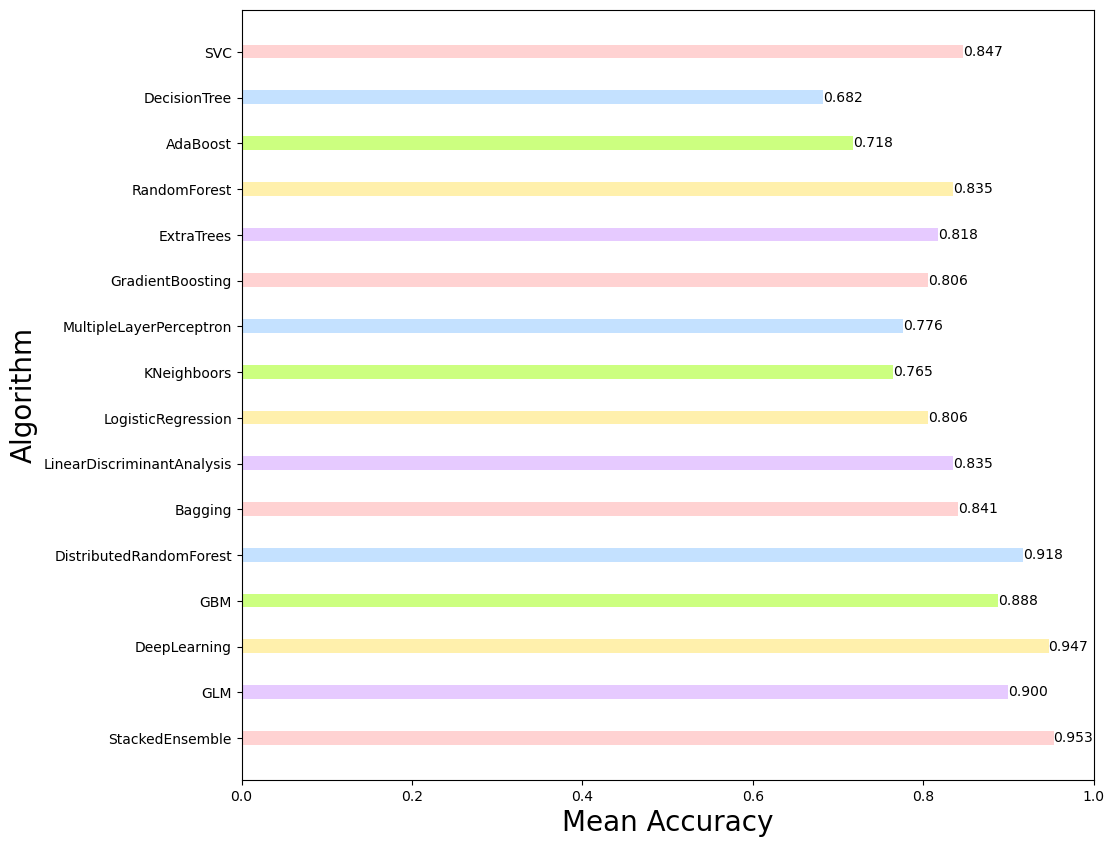

In [87]:
cv_results = [svc_acc, dt_acc, ada_acc, rf_acc, et_acc, gb_acc, mlp_acc, knn_acc, lr_acc, ld_acc, vote_acc, 
              drf_acc, gbm_acc, deeplearning_acc, glm_acc, StackedEnsemble_acc]

algorithm = ["SVC","DecisionTree","AdaBoost","RandomForest",
"ExtraTrees","GradientBoosting","MultipleLayerPerceptron", "KNeighboors", "LogisticRegression","LinearDiscriminantAnalysis", "Bagging", 
"DistributedRandomForest", "GBM", "DeepLearning", "GLM", "StackedEnsemble"]

plt.rcdefaults()
fig, ax = plt.subplots(figsize=(11, 10))

y_pos = np.arange(len(algorithm))

total_width, n = 0.4, 2
width = total_width / n
y_pos=y_pos - (total_width - width) / 2

color = ['#FFD2D2', '#C4E1FF', '#CCFF80', '#FFF0AC', '#E6CAFF']

b = ax.barh(y_pos, cv_results, align='center', color=color, ecolor='black', height=0.3)
for rect in b:
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%1.3f'%w,ha='left',va='center')

ax.set_yticks(y_pos+width/30.0)
ax.set_yticklabels(algorithm)
ax.invert_yaxis()
ax.set_ylabel("Algorithm", fontsize=20)
ax.set_xlabel("Mean Accuracy", fontsize=20)
plt.savefig("image.png", dpi=200, bbox_inches='tight')